<a href="https://colab.research.google.com/github/Sachin-crypto/Learning_Rate_Impact/blob/main/Impact_of_Learning_Rate_on_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Using SGDRegressor Model**

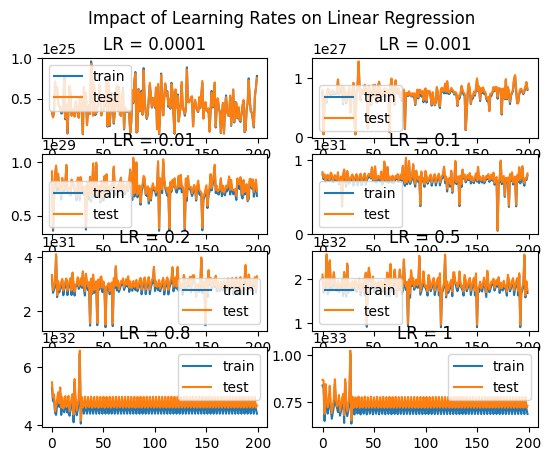

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv("/content/drive/MyDrive/Datasets/bmi_data.csv")
X = df[['Height', 'Weight', 'Gender']]
y = df['Index']

# Preparing Data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of Learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1]
# Empty List for storing errors
train_errors_list = []
test_errors_list = []

for i in range(len(learning_rates)):
    model = SGDRegressor(learning_rate='constant', eta0=learning_rates[i], random_state=42)

    train_errors = []
    test_errors = []

    for _ in range(200):
        model.partial_fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        train_errors.append(train_error)
        test_errors.append(test_error)

    train_errors_list.append(train_errors)
    test_errors_list.append(test_errors)

# Plot learning curves for each learning rate
for i in range(len(learning_rates)):
    plt.subplot(4, 2, (i + 1))
    plt.plot(train_errors_list[i], label='train')
    plt.plot(test_errors_list[i], label='test')
    plt.legend()
    plt.suptitle('Impact of Learning Rates on Linear Regression')
    plt.title('LR = ' + str(learning_rates[i]))

plt.show()